<a href="https://colab.research.google.com/github/lucaspn017/sales_time_series/blob/main/Predi%C3%A7%C3%A3o_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv('/content/superstore_sales.csv', encoding='latin1')

**1. Definição do Problema**
Contexto: Uma empresa de varejo deseja entender o comportamento das vendas nos últimos 3 anos e prever a demanda para os próximos 6 meses.

Perguntas-chave:

*   Quais produtos/categorias têm maior/menor desempenho?
*   Existe sazonalidade nas vendas?
*   Quais regiões ou segmentos de clientes são mais lucrativos?
*   Quais variáveis (ex: promoções, feriados) impactam as vendas?





In [12]:
# Exemplo: Criar coluna de Mês/Ano
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] = df['Order Date'].dt.to_period('M')

2. Coleta de Dados
Fonte de dados:

* Dataset público: Superstore Sales Dataset (Kaggle) ou dados simulados.

**Colunas esperadas:**
* Data do Pedido, Categoria do Produto, Subcategoria, Vendas, Quantidade, Lucro, Região, Segmento do Cliente, Desconto, etc.

**Ferramenta:**
* Use Python (Pandas) para importar os dados de um arquivo CSV ou Excel.

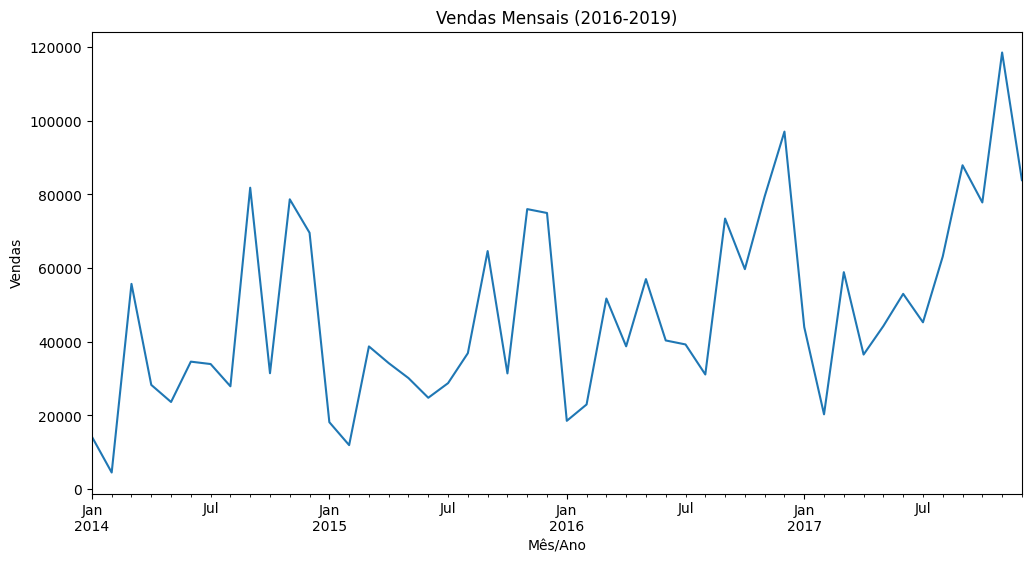

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: Tendência de vendas mensais
plt.figure(figsize=(12, 6))
df.groupby('Month_Year')['Sales'].sum().plot()
plt.title('Vendas Mensais (2016-2019)')
plt.xlabel('Mês/Ano')
plt.ylabel('Vendas')
plt.show()

3. Limpeza e Preparação dos Dados
Verificar valores ausentes, duplicatas e corrigir formatos (ex: datas).

**Criar novas variáveis:**

* Mês/Ano da venda.

* Margem de lucro (Lucro / Vendas).

* Dia da semana ou feriados (usando bibliotecas como holidays).

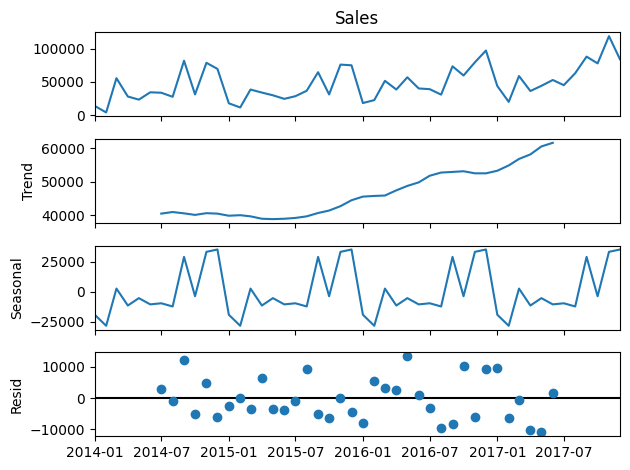

In [9]:
# Agrupar vendas por mês/ano
df_grouped = df.groupby('Month_Year')['Sales'].sum().reset_index()

# Converter 'Month_Year' para formato de data
df_grouped['Month_Year'] = df_grouped['Month_Year'].dt.to_timestamp()

# Definir a coluna de data como índice (exigido pela função seasonal_decompose)
df_grouped.set_index('Month_Year', inplace=True)

# Preencher meses faltantes (caso existam)
df_grouped = df_grouped.asfreq('MS').fillna(0)  # 'MS' = Month Start frequency

# Decomposição da série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_grouped['Sales'], model='additive', period=12)
result.plot()
plt.show()

4. Modelagem Preditiva (Machine Learning)
Objetivo: Prever vendas futuras com base em variáveis históricas.

Algoritmos testados:

* Linear Regression

* Random Forest

* XGBoost

Pré-processamento:

* Codificação de variáveis categóricas (ex: região, categoria).

* Normalização de dados.

Validação:

* Split em treino/teste.

* Métricas: RMSE, MAE.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Converter 'Order Date' para datetime (caso ainda não tenha feito)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Criar coluna 'Month' (1-12) e 'Year'
df['Month'] = df['Order Date'].dt.month  # Extrai o número do mês (1 a 12)
df['Year'] = df['Order Date'].dt.year    # Extrai o ano
# Feature engineering
X = df[['Category', 'Region', 'Discount', 'Month']]  # Variáveis relevantes
y = df['Sales']

# Codificação One-Hot
X = pd.get_dummies(X)

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Previsões
predictions = model.predict(X_test)